## Patches Extractor

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
import time

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities_NOMXNET import *

/data/Github/MouseBrainAtlas_dev/src//utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/data/MouseBrainAtlas_dev/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/MouseBrainAtlas_dev/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/data/MouseBrainAtlas_dev/mousebrainatlas_virtualenv/local

Setting environment for AWS compute node
{'MD589': 0.46}
Loaded data from saved metadata_cache for MD589


ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
No vtk
No mcubes
Folder for stack MD585 not found, skipping.
Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD594 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder

### Variables definition

In [2]:
win_id = 1
stack = 'MD589'

paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', \
                     'SNC', 'SNR', '3N', '4N', 'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']

all_structures = paired_structures + singular_structures

# 1: {'patch_size': 224, 'spacing': 56}
patch_loc_root = ROOT_DIR+'/CSHL_patch_locations/'+stack+'/'+stack+'_prep2_gray_win1/'
images_root = ROOT_DIR+'/CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail/'
raw_images_root = ROOT_DIR+'/CSHL_data_processed/'+stack+'/'+stack+'_prep2_lossless_gray/'

patch_fn_list = ! ls $patch_loc_root
image_fn_list = ! ls $images_root
raw_image_fn_list = ! ls $raw_images_root

filename_to_section, section_to_filename = DataManager.load_sorted_filenames( stack )

In [3]:
windowing_settings

{1: {'patch_size': 224, 'spacing': 56},
 2: {'comment': 'larger margin', 'patch_size': 224, 'spacing': 56},
 3: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 32},
 4: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 128},
 5: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 64},
 6: {'comment': 'twice as large patch', 'patch_size': 448, 'spacing': 64},
 7: {'comment': 'specify size/spacing in terms of microns rather than pixels',
  'patch_size_um': 103.04,
  'spacing_um': 30},
 8: {'comment': 'larger patch', 'patch_size_um': 206.08, 'spacing_um': 30},
 9: {'comment': 'larger patch', 'patch_size_um': 412.16, 'spacing_um': 30},
 10: {'comment': 'larger patch', 'patch_size_um': 824.32, 'spacing_um': 30},
 11: {'comment': 'larger patch', 'patch_size_um': 51.52, 'spacing_um': 30},
 12: {'comment': 'larger patch', 'patch_size_um': 25.76, 'spacing_um': 30}}

### Download essential files

In [4]:
def setup_download_from_s3( rel_fp, recursive=True ):
    s3_fp = 's3://mousebrainatlas-data/'+rel_fp
    local_fp = os.environ['ROOT_DIR']+rel_fp

    if os.path.exists(local_fp):
        print('ALREADY DOWNLOADED FILE')
        return 
    
    if recursive:
        ! aws s3 cp --recursive $s3_fp $local_fp
    else:
        ! aws s3 cp $s3_fp $local_fp

In [5]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_metadata_cache.json', recursive=False)

ALREADY DOWNLOADED FILE


In [6]:
setup_download_from_s3('CSHL_patch_locations/'+stack+'/'+stack+'_prep2_gray_win1/')

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep2_gray_w

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep2_gray_w

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep2_gray_w

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep2_gray_w

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep2_gray_w

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep2_gray_win1_patc

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep2_gray_win1_patchLoc

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep2_gray_win1_patchLoc

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep2_gray_win1_patchLoc

download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep2_gray_win1_patchLocations.txt
download: s3://mousebrainatlas-data/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep2_gray_win1_patchLocations.txt to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_patch_locations/MD589/MD589_prep2_gray_win1/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep2_gray_win1_patchLoc

In [7]:
setup_download_from_s3('CSHL_data_processed/'+stack+'/'+stack+'_prep2_thumbnail/')

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/M

download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep2_thumbnail.tif
download: s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep2_thumbnail.tif to ../../../../BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep2_thumbnail.tif


### Identify patches based on human annotation
--script identify_patch_class_based_on_labeling_v3_human_annotations.py

In [10]:
fp, latest_timestamp = DataManager.get_annotation_filepath(stack, by_human=True, suffix='contours', \
            timestamp='latest', return_timestamp=True, annotation_rootdir=ANNOTATION_ROOTDIR, download_s3=False)
grid_index_class_lookup_fp = \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, 
                                                               by_human=True, timestamp=latest_timestamp)
if not os.path.exists(grid_index_class_lookup_fp):
    ! python identify_patch_class_based_on_labeling_v3_human_annotations.py MD589 1
else:
    print('ALREADY IDENTIFY PATCHES')

grid_index_class_lookup = load_hdf_v2(grid_index_class_lookup_fp)

latest timestamp:  05312018031718
ALREADY IDENTIFY PATCHES


In [11]:
# Convert to x, y locations using 'all_locs'
all_locs = grid_parameters_to_sample_locations(win_id=win_id, stack=stack)

### List valid patches according to structures and sections

In [12]:
all_patch_locations = {}

for structure in all_structures:    
    valid_sections = []
    try:
        possibly_valid_sections = grid_index_class_lookup[structure].keys()
    except Exception as e:
        print(e)
        print('SKIPPING: '+structure)
        continue
        
    all_patch_locations[structure] = {}

    # Make a list of all sections where patches actually exist
    for section in possibly_valid_sections:
        # If this table entry is a numpy array, then it is filled with data. Otherwise (float) it is 'nan'
        if isinstance(grid_index_class_lookup[structure][section], np.ndarray):
            valid_sections.append( section )
            
    for section in valid_sections:
        valid_patch_indices = grid_index_class_lookup[structure][ section ]
        patch_coors =  all_locs[ valid_patch_indices ].tolist()
        all_patch_locations[structure][int(section)] = patch_coors

### Patch examples display

Number of Positive Patches: 163


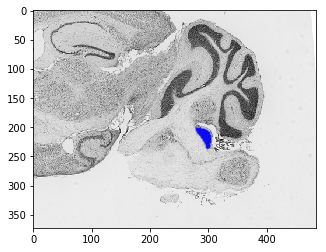

In [13]:
x_pts_str = []
y_pts_str = []
x_raw = []
y_raw = []
x_offset = -50
y_offset = -11
structure = 'DC'
section = all_patch_locations[structure].keys()[20]
valid_patch_indices = grid_index_class_lookup[structure][ section ]
print 'Number of Positive Patches:',len(valid_patch_indices)

for x, y in all_locs[valid_patch_indices]:
    x_raw.append( (float(x)) )
    y_raw.append( (float(y)) )
    x_pts_str.append( (float(x)/32)+x_offset )
    y_pts_str.append( (float(y)/32)+y_offset )
    
img = cv2.imread( images_root+section_to_filename[section]+'_prep2_thumbnail.tif' , 2)
#plt.figure( figsize=(50,50) )
plt.imshow( img, cmap='gray')

plt.scatter(x_pts_str, y_pts_str, s=1, c='blue', alpha=.5)

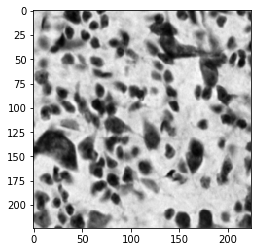

In [14]:

img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
index = 50
x = int( float( all_patch_locations[structure][section][index][0] ) ) + x_offset*32
y = int( float( all_patch_locations[structure][section][index][1] ) ) + y_offset*32

patch = img[y:y+224,x:x+224]


plt.imshow( patch, cmap='gray')

### Save patches to files

In [15]:
x_offset = -1600
y_offset = -352
! mkdir $ROOT_DIR/CSHL_patches
! mkdir $ROOT_DIR/CSHL_patches/$stack
for structure in all_patch_locations.keys():
    savepath=ROOT_DIR+'/CSHL_patches/'+stack+'/'+structure
    ! mkdir $savepath
    for section in all_patch_locations[structure].keys():
        img = cv2.imread( raw_images_root+section_to_filename[section]+'_prep2_lossless_gray.tif', 2)
        for index in range(len(all_patch_locations[structure][section])):
            x = int( float( all_patch_locations[structure][section][index][0] ) ) + x_offset
            y = int( float( all_patch_locations[structure][section][index][1] ) ) + y_offset
            patch = img[y:y+224,x:x+224]
            filename=savepath+'/'+str(section)+'_'+str(index)+'.tif'
            cv2.imwrite(filename, patch)


KeyboardInterrupt: 